<a href="https://colab.research.google.com/github/muhammad-usama-aleem/classification_general_military_tank/blob/main/Final_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **loading dataset**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/combined.zip

Archive:  /content/gdrive/MyDrive/combined.zip
   creating: army/
  inflating: army/10.png             
  inflating: army/1000.png           
  inflating: army/1003.png           
  inflating: army/1004.png           
  inflating: army/1005.png           
  inflating: army/1007.png           
  inflating: army/1008.png           
  inflating: army/1009.png           
  inflating: army/1011.png           
  inflating: army/1013.png           
  inflating: army/1015.png           
  inflating: army/1016.png           
  inflating: army/1019.png           
  inflating: army/1020.png           
  inflating: army/1021.png           
  inflating: army/1022.png           
  inflating: army/1023.png           
  inflating: army/1024.png           
  inflating: army/1025.png           
  inflating: army/1026.png           
  inflating: army/1027.png           
  inflating: army/103.png            
  inflating: army/1030.png           
  inflating: army/1032.png           
  inflating: army/1033

In [3]:
from google.colab import drive
drive.flush_and_unmount()

In [4]:
import tensorflow as tf

# physical_devices = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [35]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
BATCH_SIZE = 32

TRAIN_DIR = "/content/train"


train_data = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.15,
    subset='training',
    seed=124,
    image_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size = 32
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.15,
    subset='validation',
    seed=124,
    image_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size = 32
)

class_names = train_data.class_names

Found 3123 files belonging to 3 classes.
Using 2655 files for training.
Found 3123 files belonging to 3 classes.
Using 468 files for validation.


In [36]:
print(class_names)

['army', 'men', 'tanks']


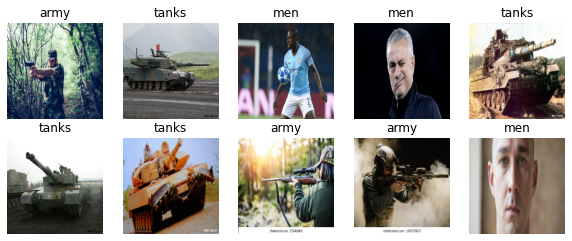

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for images, labels in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [39]:
inputs = tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = img_augmentation(inputs)

In [40]:
model = tf.keras.applications.EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

16719872/16705208 [==============================] - 0s 0us/step


In [41]:
# Freeze the pretrained weights
model.trainable = False
# Rebuild top
x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = tf.keras.layers.BatchNormalization()(x)


outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="pred")(x)

# Compiling

In [42]:
# Compile
model = tf.keras.Model(inputs, outputs, name="EfficientNet")
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']   

In [43]:
epochs = 25  
hist = model.fit(train_data, epochs=epochs, validation_data=val_data, verbose=2)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


83/83 - 33s - loss: 0.2877 - accuracy: 0.8874 - val_loss: 0.1399 - val_accuracy: 0.9893 - 33s/epoch - 398ms/step
Epoch 2/25
83/83 - 21s - loss: 0.1136 - accuracy: 0.9612 - val_loss: 0.0625 - val_accuracy: 0.9915 - 21s/epoch - 258ms/step
Epoch 3/25
83/83 - 21s - loss: 0.0956 - accuracy: 0.9638 - val_loss: 0.0326 - val_accuracy: 0.9936 - 21s/epoch - 258ms/step
Epoch 4/25
83/83 - 21s - loss: 0.0936 - accuracy: 0.9638 - val_loss: 0.0257 - val_accuracy: 0.9936 - 21s/epoch - 252ms/step
Epoch 5/25
83/83 - 21s - loss: 0.0779 - accuracy: 0.9714 - val_loss: 0.0200 - val_accuracy: 0.9936 - 21s/epoch - 252ms/step
Epoch 6/25
83/83 - 21s - loss: 0.0673 - accuracy: 0.9740 - val_loss: 0.0204 - val_accuracy: 0.9936 - 21s/epoch - 258ms/step
Epoch 7/25
83/83 - 22s - loss: 0.0689 - accuracy: 0.9766 - val_loss: 0.0222 - val_accuracy: 0.9893 - 22s/epoch - 270ms/step
Epoch 8/25
83/83 - 21s - loss: 0.0620 - accuracy: 0.9774 - val_loss: 0.0216 - val_accuracy: 0.9893 - 21s/epoch - 256ms/step
Epoch 9/25
83/83 - 

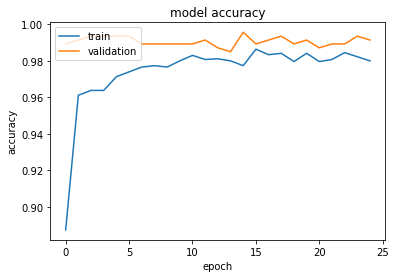

In [44]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [45]:
model.evaluate(val_data)

15/15 [==============================] - 4s 164ms/step - loss: 0.0240 - accuracy: 0.9915


[0.02395821548998356, 0.9914529919624329]

In [46]:
results = model.predict(val_data)

In [56]:
# !rm -rf /content/inetlenv

In [57]:
model.save("inetlenv")

INFO:tensorflow:Assets written to: inetlenv/assets


In [58]:
!zip -r /content/inetlenv.zip /content/inetlenv/

  adding: content/inetlenv/ (stored 0%)
  adding: content/inetlenv/variables/ (stored 0%)
  adding: content/inetlenv/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/inetlenv/variables/variables.index (deflated 76%)
  adding: content/inetlenv/keras_metadata.pb (deflated 95%)
  adding: content/inetlenv/assets/ (stored 0%)
  adding: content/inetlenv/saved_model.pb (deflated 91%)


In [59]:
model.save("my_h5_model.h5")